In this notebook, I'll be cleaning and graphing the data related to length of time in Canada, excerise, number of household members, and saving the final results into csv files.

In [1]:
# import libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/home/salma/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#import data
df = pd.read_csv('Cleaned_NS.csv')

In [3]:
columns = ['participant_ID',
           'time_in_Canada',
           'number_household_members',
           'can_exercise_regularly',
           'if_yes_how_often_exercise',
          ]       
           

In [4]:
df = df[columns]

In [5]:
df.describe()

,participant_ID,time_in_Canada,number_household_members,can_exercise_regularly,if_yes_how_often_exercise
count,4054,3967,4036,4027,3842
unique,4054,8,5,3,6
top,ns 757,canadian born,2 to 4,yes,2-4 times a week
freq,1,1916,2335,2747,1434


In [6]:
# checking null values:
df.isna().sum()

participant_ID                 0
time_in_Canada                87
number_household_members      18
can_exercise_regularly        27
if_yes_how_often_exercise    212
dtype: int64

In [7]:
# fill nulls with 'prefer not to answer'
df.fillna('prefer not to answer', inplace = True)

# Checking the values in each column:

In [8]:
# Q19. Are you able to exercise regularly?
df.can_exercise_regularly.value_counts()

can_exercise_regularly
yes                     2747
no                      1148
prefer not to answer     159
Name: count, dtype: int64

In [9]:
# Q20. If yes, how often do you exercise?
df.if_yes_how_often_exercise.value_counts()

if_yes_how_often_exercise
2-4 times a week           1434
less than 1 time a week     732
do not exercise             560
daily                       508
prefer not to answer        443
5 or more times a week      377
Name: count, dtype: int64

In [10]:
# Q37. How long have you lived in Canada?
df.time_in_Canada.value_counts()

time_in_Canada
canadian born           1916
10 or more years         552
1-4 years                534
less than 1 year ago     447
5-9 years                425
prefer not to answer     132
not applicable            36
less than 1 year          12
Name: count, dtype: int64

In [11]:
# unifying less than 1 year:
to_unify = df[df.time_in_Canada.str.contains('less than 1 year') == True].index

In [12]:
# changing values:
df.loc[to_unify, 'time_in_Canada'] = 'less than 1 year ago'

In [13]:
df.time_in_Canada.value_counts()

time_in_Canada
canadian born           1916
10 or more years         552
1-4 years                534
less than 1 year ago     459
5-9 years                425
prefer not to answer     132
not applicable            36
Name: count, dtype: int64

In [14]:
# Q26. How many people live in your household, including yourself?
df.number_household_members.value_counts()

number_household_members
2 to 4                  2335
one                      770
5 to 7                   716
more than 7              146
prefer not to answer      87
Name: count, dtype: int64

In [15]:
# info:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4054 entries, 0 to 4053
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   participant_ID             4054 non-null   object
 1   time_in_Canada             4054 non-null   object
 2   number_household_members   4054 non-null   object
 3   can_exercise_regularly     4054 non-null   object
 4   if_yes_how_often_exercise  4054 non-null   object
dtypes: object(5)
memory usage: 158.5+ KB


In [16]:
# save the dataframe as a csv file.
df.to_csv('NS_miscellaneous.csv', index = False)

# Creating graphics:

### Time in Canada

In [17]:
time_in_Canada = df.time_in_Canada.value_counts().reset_index()

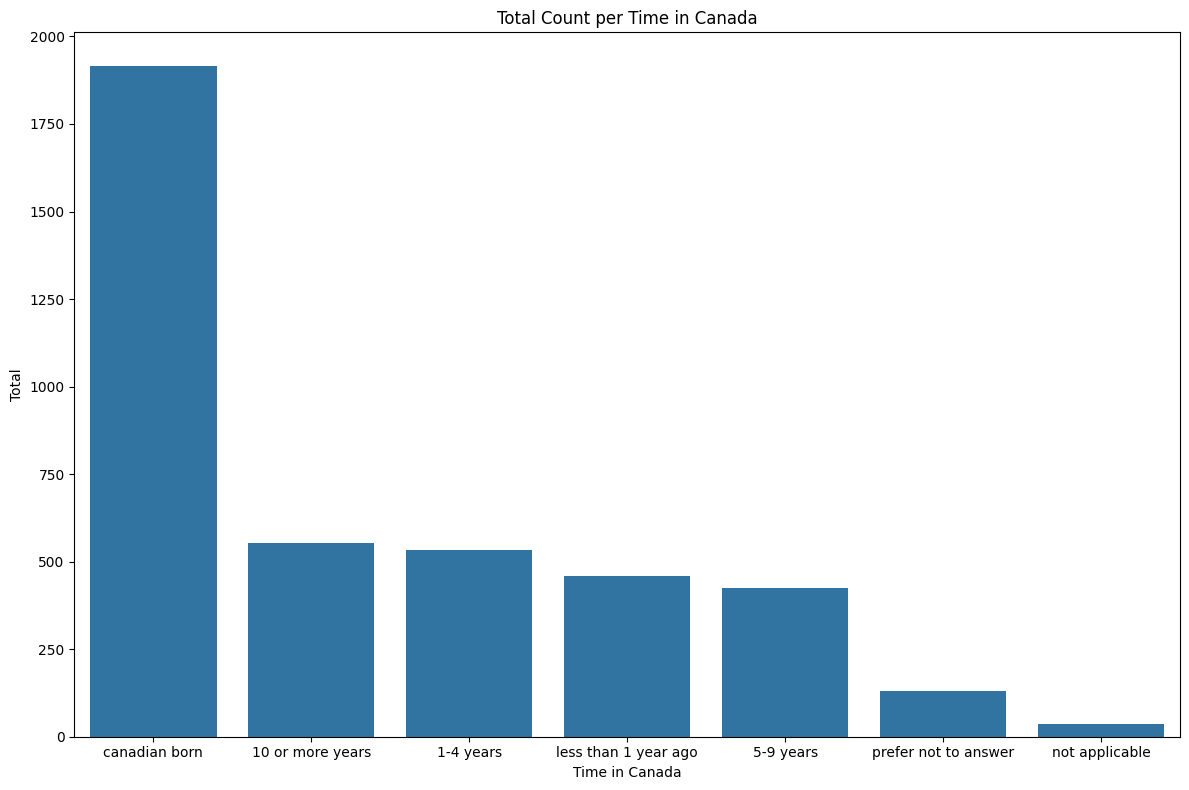

In [18]:
# plotting the time_in_Canada results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= time_in_Canada,
    x ='time_in_Canada',
    y ='count',
    errorbar=None
)


plt.xlabel('Time in Canada')
plt.ylabel('Total')
plt.title('Total Count per Time in Canada')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('time_in_Canada_summary.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [19]:
# save the above dataframe into a csv file:
time_in_Canada.to_csv('time_in_canada.csv')

### Number of Household Members:

In [20]:
number_household_members = df.number_household_members.value_counts().reset_index()

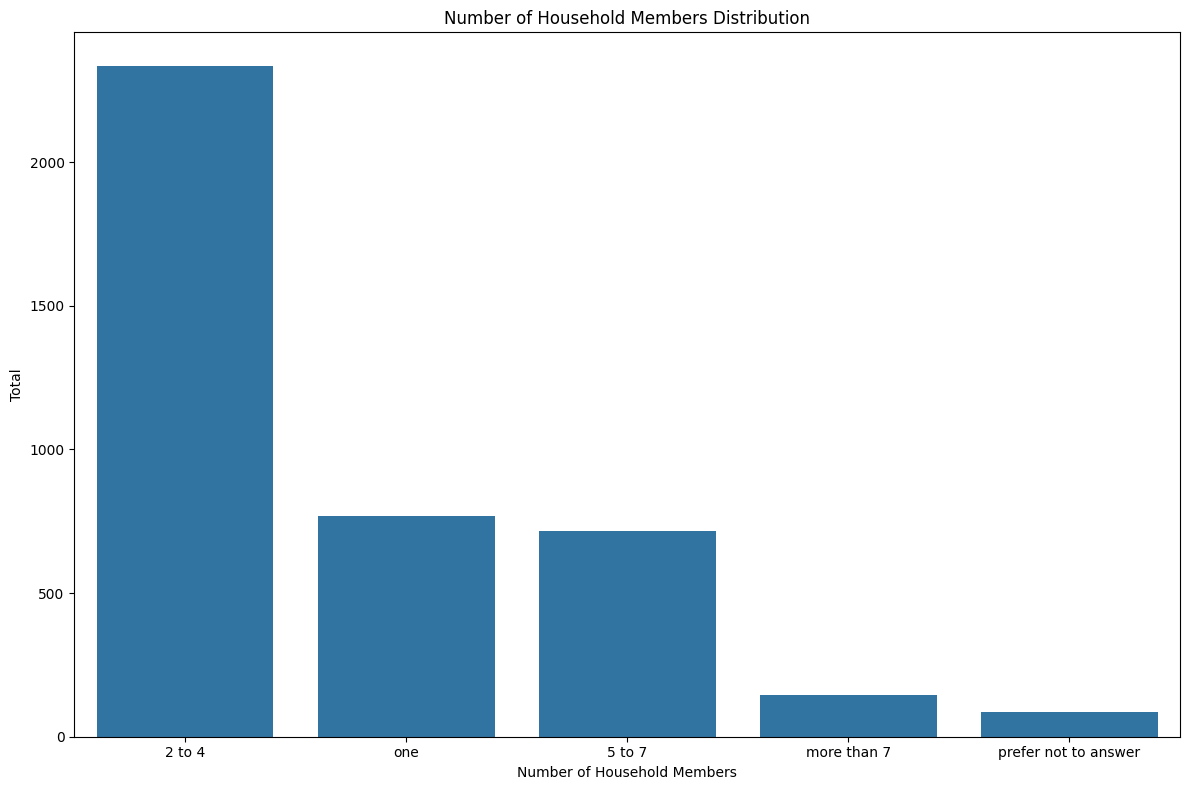

In [21]:
# plotting the results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= number_household_members,
    x ='number_household_members',
    y ='count',
    errorbar=None
)

plt.xlabel('Number of Household Members')
plt.ylabel('Total')
plt.title('Number of Household Members Distribution')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('number_household_members.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [22]:
# save the above dataframe into a csv file:
number_household_members.to_csv('number_household_members.csv')

### Exercise:

#### a)  Ability to do it:

In [23]:
can_exercise = df.can_exercise_regularly.value_counts().reset_index()

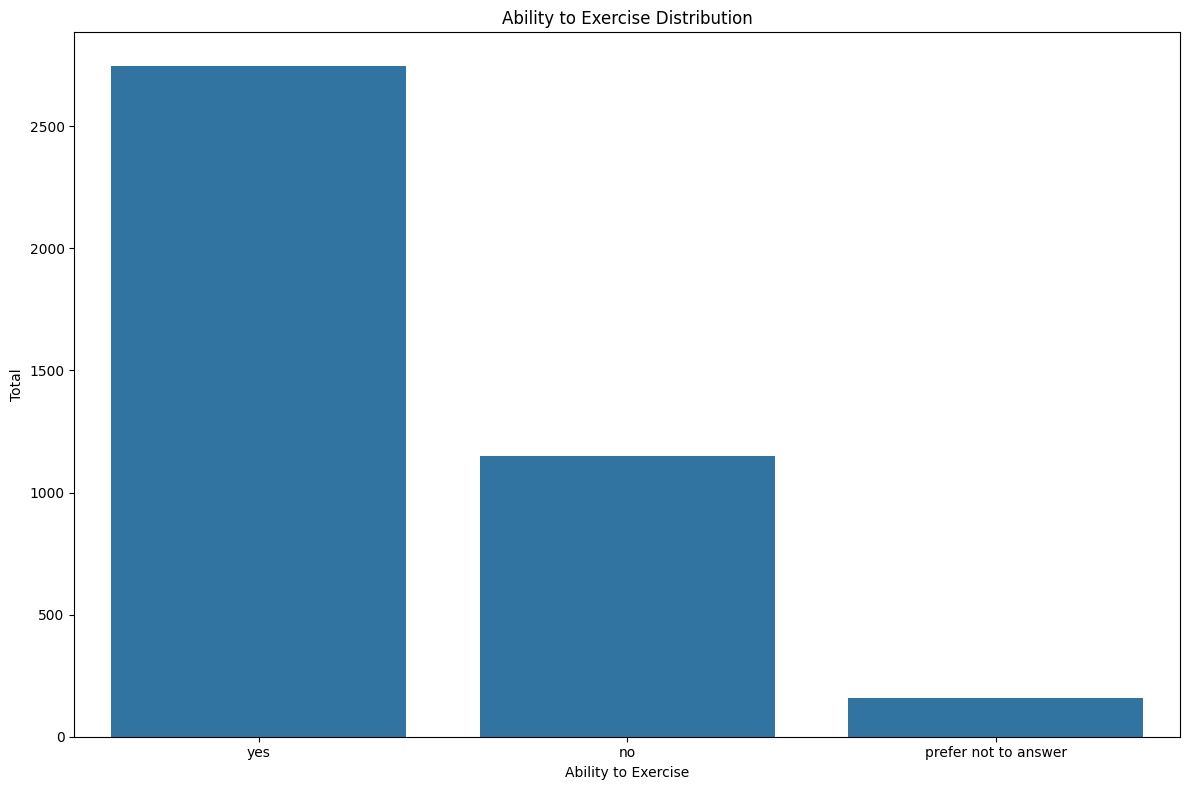

In [24]:
# plotting the results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= can_exercise,
    x ='can_exercise_regularly',
    y ='count',
    errorbar=None
)

plt.xlabel('Ability to Exercise')
plt.ylabel('Total')
plt.title('Ability to Exercise Distribution')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('Ability_to_exercise.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [25]:
# save the above dataframe into a csv file:
can_exercise.to_csv('ability_to_exercise.csv')

#### b) Frequency:

In [26]:
exercise_frequency = df.if_yes_how_often_exercise.value_counts().reset_index()

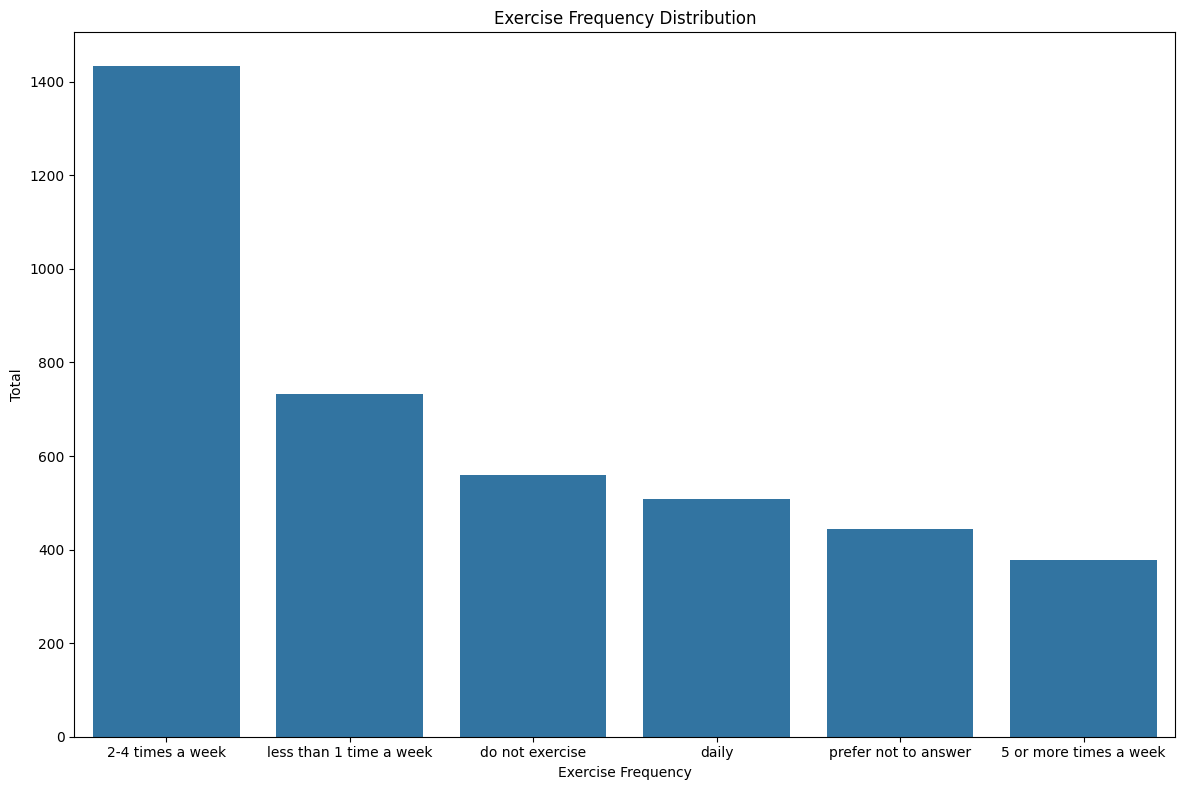

In [27]:
# plotting the results:
plt.figure(figsize=(12, 8))
sns.barplot(
    data= exercise_frequency,
    x ='if_yes_how_often_exercise',
    y ='count',
    errorbar=None
)

plt.xlabel('Exercise Frequency')
plt.ylabel('Total')
plt.title('Exercise Frequency Distribution')


# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig('exercise_frequency.png', dpi=300, bbox_inches='tight')

# show figure
plt.show()

In [28]:
# save the above dataframe into a csv file:
exercise_frequency.to_csv('exercise_frequency.csv')